#Introduction

###The Groceries dataset is a popular dataset used for market basket analysis, association rule learning, and frequent itemset mining. It consists of transactions from a grocery store, where each transaction is a list of items purchased together by a customer.

###Key Characteristics:

##Transactional Data: The dataset is a collection of transactions, where each transaction is a list of items.
##Sparse Data: Typically, the dataset is sparse, meaning that most items do not appear in most transactions.
##Categorical Data: Items are represented by categorical names or IDs.

#Details of the dataset

###The dataset has 38765 rows of the purchase orders of people from the grocery stores. These orders can be analysed and association rules can be generated using Market Basket Analysis by algorithms like Apriori Algorithm.

#Association Rule Mining

###Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

#Apriori Algorithm

###Apriori is an algorithm for frequent itemset mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent itemsets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

#Source:

 https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset?

#Importing Necessary Libraries

In [1]:
!pip install apyori #Installing apriori library


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=ade301a0256f476cd6445a8732608de72dbb50b05543330f4c11b343c491d2e9
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
import numpy as np #NumPy is a powerful tool for numerical computations in Python.
import pandas as pd  #Pandas is a powerful library for data manipulation and analysis.
import seaborn as sns #Seaborn is a statistical data visualization library based on Matplotlib.
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

#Loading the Dataset.

In [3]:
df = pd.read_csv('Groceries_dataset.csv')

###We will now read the data from a CSV file into a Pandas DataFrame Let us have a look at how our dataset looks like using df.head()

In [4]:
df.head() #Displays the first 5 rows of the dataset.

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
df.columns #Displays columns names of the dataset.

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [6]:
df.shape #Displays the total count of the Rows and Columns respectively.

(38765, 3)

In [7]:
df.isnull().sum() # Displays the total count of the null values in the particular columns.

Member_number      0
Date               0
itemDescription    0
dtype: int64

There is no null or missing value in the dataset.

In [8]:
df.info() # Displays the total count of values present in the particular column along with the null count and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


#Checking for the Duplicate values

In [9]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate values found.")
else:
    print("Duplicate values found:")
    print(duplicate_rows)

Duplicate values found:
       Member_number        Date   itemDescription
5015            2051  11-09-2015       frankfurter
5022            3055  18-08-2015  other vegetables
5044            1994  11-03-2015        whole milk
5055            1682  25-06-2015         pip fruit
5059            4324  05-01-2015           sausage
...              ...         ...               ...
38614           2027  26-02-2014     domestic eggs
38684           2936  07-03-2014        newspapers
38685           2311  13-03-2014        pot plants
38722           3834  18-05-2014       salty snack
38723           1146  23-05-2014            yogurt

[759 rows x 3 columns]


In [10]:
df.describe(include='all')

,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,21-01-2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


In [11]:
df['Date'] = pd.to_datetime(df['Date']) #Type-Conversion from Object to Dateime

<ipython-input-11-dabe41c7ec21>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date']) #Type-Conversion from Object to Dateime


###This code converts the data in the 'Date' column of the DataFrame df to datetime objects. This conversion is crucial for performing any time-series analysis or date-related operations such as filtering, extracting specific parts of the date (like year, month, day), and calculating date differences.

In [12]:
df.info() #checking if the date columns are in proper format so we can use the data for further analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [13]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [14]:
df.Member_number.nunique() #The df.Member_number.nunique() function is a Pandas method used to find the number of unique values in the Member_number column of a DataFrame df.

3898

In [15]:
df.itemDescription.nunique() #The df.itemDescription.nunique() function is a Pandas method used to find the number of unique values in the itemDescription column of a DataFrame df.

167

In [16]:
df.Date.nunique() #The df.Date.nunique() function is a Pandas method used to find the number of unique values in the Date column of a DataFrame df.

728

## Creating Distribution of Item Sold

In [17]:
Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10) #code performs a series of operations to find and display the top 10 most frequently occurring items in the itemDescription column of a DataFrame df.

In [18]:
Item_distr #Displays the result.

,itemDescription,Frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


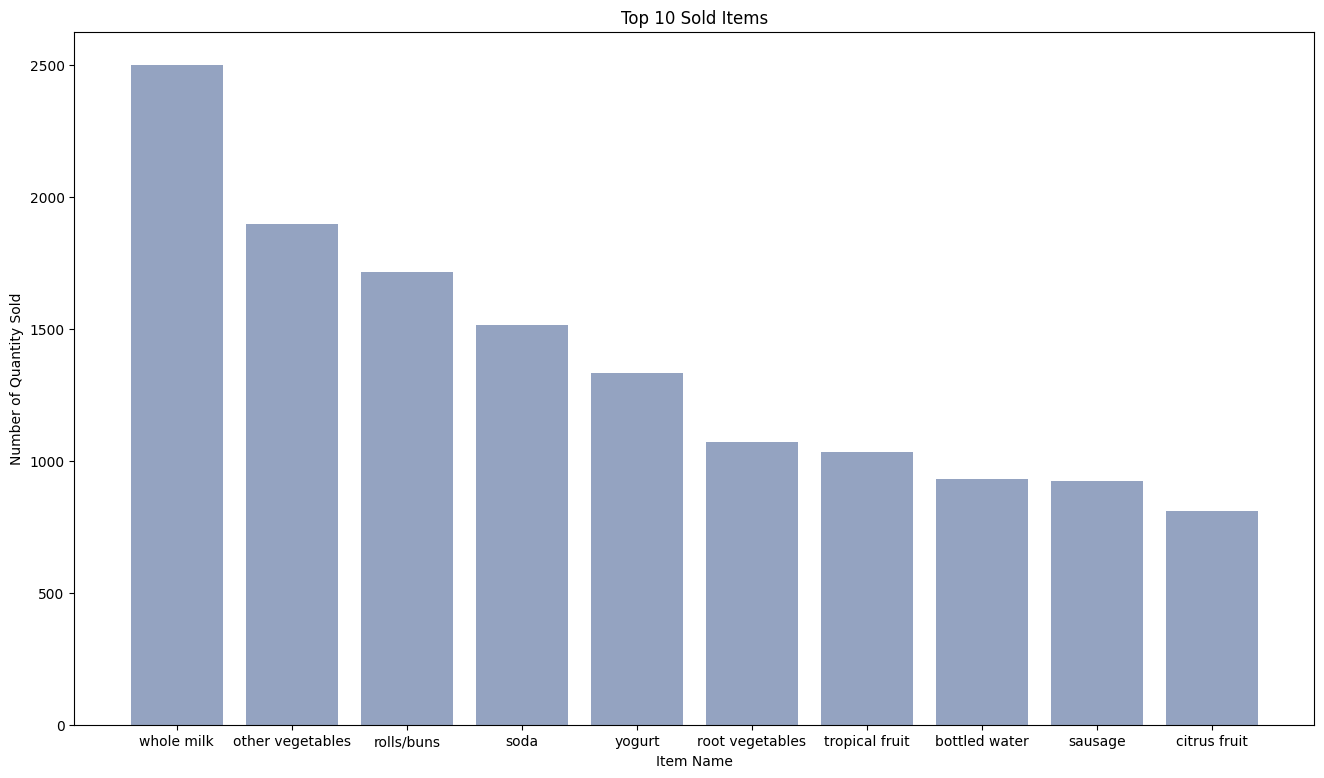

In [19]:
## Declaring variables
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size
plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Shows graph
plt.show()

In [20]:
df_date=df.set_index(['Date']) ## Setting date as index for plotting purpose
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk
...,...,...
2014-10-08,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

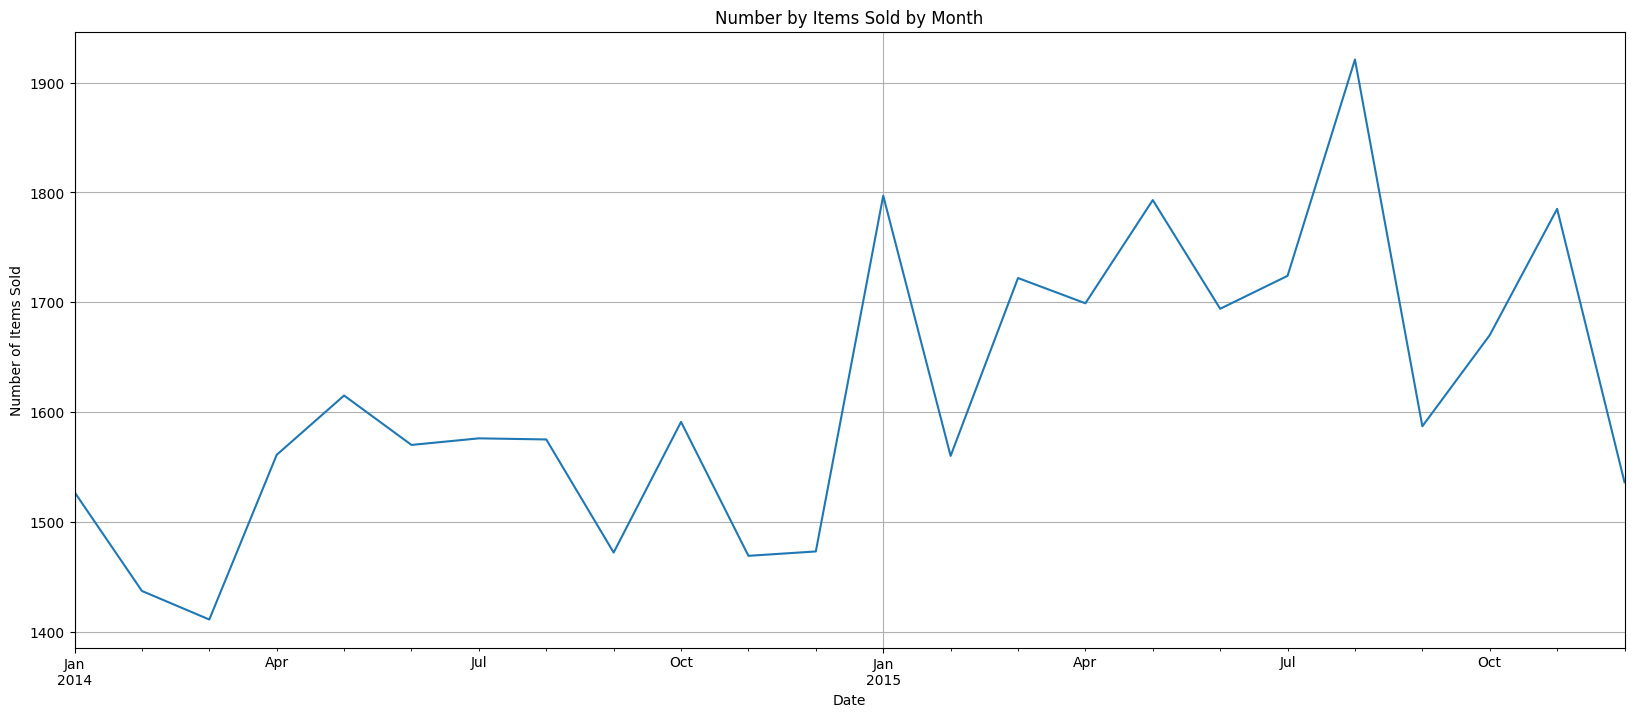

In [21]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

Apriori is an algorithm for frequent itemset mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent itemsets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

#Data Preparation

In [22]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) #This is often done to focus on the variables that are relevant for the analysis or modeling, reducing the complexity and memory usage of the DataFrame.
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() #To remove any leading or trailing white spaces from the itemDescription column.
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


#Creating Transaction list

In [23]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] #Combining all the items in list format for each customer.

#Train Model

In [24]:
from apyori import apriori #Importing apriori package

In [26]:
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2) #Model Creation

In [27]:
results = list(rules) #Storing results in list format for better visualisation.

In [28]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

The inspect(results) function processes the association rule mining results to extract and organize key metrics (LHS, RHS, support, confidence, lift) into a list of tuples. This list is then used to create a DataFrame, making it easier to analyze and visualize the association rules.

In [29]:
#Creating user-defined function for arranging the results obtained from model into readable format

def inspect(results): #This defines a function named inspect that takes one parameter, results. The results parameter is expected to be a list of tuples or lists, each containing information about an association rule.
    lhs         = [tuple(result[2][0][0])[0] for result in results] #This line creates a list comprehension to extract the left-hand side (LHS) of each rule.
    rhs         = [tuple(result[2][0][1])[0] for result in results] #This line is similar to the previous one but extracts the right-hand side (RHS) of each rule
    supports    = [result[1] for result in results] #This line creates a list of support values for each rule. The support is usually found at the second index (result[1]) in each result tuple.
    confidences = [result[2][0][2] for result in results] #This line extracts the confidence values for each rule. The confidence is typically stored at result[2][0][2].
    lifts       = [result[2][0][3] for result in results] #This line extracts the lift values for each rule. The lift is typically found at result[2][0][3]
    return list(zip(lhs, rhs, supports, confidences, lifts)) #This line combines all the extracted values (lhs, rhs, supports, confidences, and lifts) into a list of tuples using the zip function. Each tuple contains the LHS, RHS, support, confidence, and lift of a rule.
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift']) #This line calls the inspect function with the results and creates a DataFrame using the resulting list of tuples.

In [30]:
resultsinDataFrame.nlargest(n=10, columns="Lift") #Showing best possible scenarios

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
4,flour,mayonnaise,0.002309,0.063380,3.338599
6,sparkling wine,waffles,0.002565,0.217391,3.150154
5,rice,napkins,0.003079,0.244898,3.011395
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239


###The inspect(results) function processes the association rule mining results to extract and organize key metrics (LHS, RHS, support, confidence, lift) into a list of tuples. This list is then used to create a DataFrame, making it easier to analyze and visualize the association rules.